# DebyeBenchmarker 
In this notebook, we'll demonstrate how to use the DebyeBenchmarker class to benchmark nanoparticle generation and Debye calculations on your machine.

In [1]:
# Import necessary modules and functions
from debyecalculator.utility.benchmark import DebyeBenchmarker, to_csv, from_csv

# Set up a DebyeBenchmarker instance
radii_to_benchmark = [2, 4, 6, 8, 10, 12, 14, 16]
function_to_benchmark = 'gr'
benchmarker = DebyeBenchmarker(function = function_to_benchmark, radii=radii_to_benchmark)

# Make folder for benchmarking CSVs
import os
if not os.path.exists('benchmarks/'):
    os.mkdir('benchmarks')

### 1. Benchmarking DebyeCalculator

The `benchmark` method provides the flexibility to generate nanoparticles individually or all at once. Setting the `generate_individually` parameter to `True` generates structures one at a time. However, note that the function is generally more efficient when all structures are generated at the same time - this will however increase the maximum amount of memory needed to keep all structures in memory at once. If `generate_individually == True` timings and memory usage will be displayed as the means across structures. The `repetitions` parameter controls the number of repetitions for the benchmark. We'll then display the generated statistics table and save it to a CSV file.

In [2]:
# Benchmark Debye calculator and display statistics (CPU)
benchmarker.set_device('cpu')
calculator_stats_cpu = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(calculator_stats_cpu)

# Save statistics to a CSV file
csv_calculator_path_cpu = 'benchmarks/benchmark_stats_cpu.csv'
to_csv(calculator_stats_cpu, csv_calculator_path_cpu)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size 10_000
benchmarker.set_device('cuda')
benchmarker.set_batch_size(10_000)
calculator_stats_cuda_10k = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(calculator_stats_cuda_10k)

# Save statistics to a CSV file
csv_calculator_path_cuda_10k = 'benchmarks/benchmark_stats_cuda_10k.csv'
to_csv(calculator_stats_cuda_10k, csv_calculator_path_cuda_10k)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size: 1_000
benchmarker.set_device('cuda')
benchmarker.set_batch_size(1_000)
calculator_stats_cuda_1k = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(calculator_stats_cuda_1k)

# Save statistics to a CSV file
csv_calculator_path_cuda_1k = 'benchmarks/benchmark_stats_cuda_1k.csv'
to_csv(calculator_stats_cuda_1k, csv_calculator_path_cuda_1k)

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+---------------------------------------------------------------------------------------------------------------------------+
|                                       Benchmark Generator / cpu / Batch Size: 10000                                       |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA Memory (Structure) [MB] | MaxAlloc. CUDA Memory (Calc) [MB] |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
|        2.0 |          5 |  0.00245 | 0.00049 |                                0.00000 |                           0.00000 |
|        4.0 |         47 |  0.00465 | 0.00077 |                                0.00000 |                           0.00000 |
|        6.0 |        161 |  0.04031 | 0.00211 |                                0.00000 |                           0.

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+---------------------------------------------------------------------------------------------------------------------------+
|                                       Benchmark Generator / cuda / Batch Size: 10000                                      |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA Memory (Structure) [MB] | MaxAlloc. CUDA Memory (Calc) [MB] |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
|        2.0 |          5 |  0.00540 | 0.00138 |                               14.07590 |                          18.80781 |
|        4.0 |         47 |  0.01094 | 0.00297 |                               14.07642 |                          23.42861 |
|        6.0 |        161 |  0.04152 | 0.00850 |                               14.07744 |                         101.

Benchmarking Calculator...:   0%|          | 0/8 [00:00<?, ?it/s]

+---------------------------------------------------------------------------------------------------------------------------+
|                                       Benchmark Generator / cuda / Batch Size: 1000                                       |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA Memory (Structure) [MB] | MaxAlloc. CUDA Memory (Calc) [MB] |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
|        2.0 |          5 |  0.00326 | 0.00030 |                               14.07590 |                          18.80781 |
|        4.0 |         47 |  0.00460 | 0.00070 |                               14.07642 |                          19.16006 |
|        6.0 |        161 |  0.01366 | 0.00235 |                               14.07744 |                          23.

### 2. Load and Display Statistics from CSV
Now, let's load the statistics from the CSV files we saved earlier and display the tables.

In [3]:
# Load statistics from the CSV files and display them
loaded_stats_cpu = from_csv(csv_calculator_path_cpu)
loaded_stats_cuda_10k = from_csv(csv_calculator_path_cuda_10k)
loaded_stats_cuda_1k = from_csv(csv_calculator_path_cuda_1k)

print("\nLoaded Calculator Statistics CPU:")
print(loaded_stats_cpu)

print("\nLoaded Calculator Statistics CUDA (batch size 10k):")
print(loaded_stats_cuda_10k)

print("\nLoaded Calculator Statistics CUDA (batch size 1k):")
print(loaded_stats_cuda_1k)


Loaded Calculator Statistics CPU:
+---------------------------------------------------------------------------------------------------------------------------+
|                                       Benchmark Generator /  cpu / Batch Size: 10000                                      |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAlloc. CUDA Memory (Structure) [MB] | MaxAlloc. CUDA Memory (Calc) [MB] |
+------------+------------+----------+---------+----------------------------------------+-----------------------------------+
|        2.0 |          5 |  0.00245 | 0.00049 |                                0.00000 |                           0.00000 |
|        4.0 |         47 |  0.00465 | 0.00077 |                                0.00000 |                           0.00000 |
|        6.0 |        161 |  0.04031 | 0.00211 |                                0.0

### 5: Plotting Benchmark Results

In [4]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np

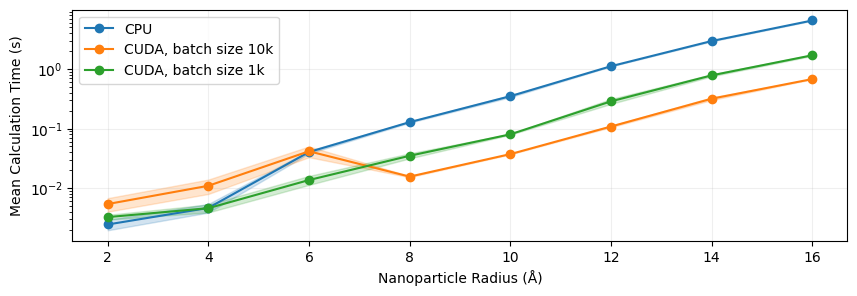

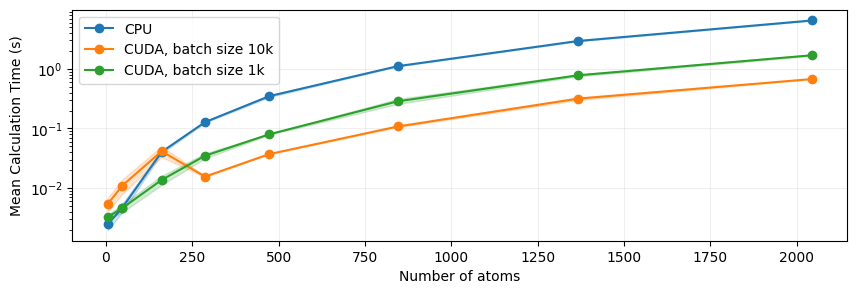

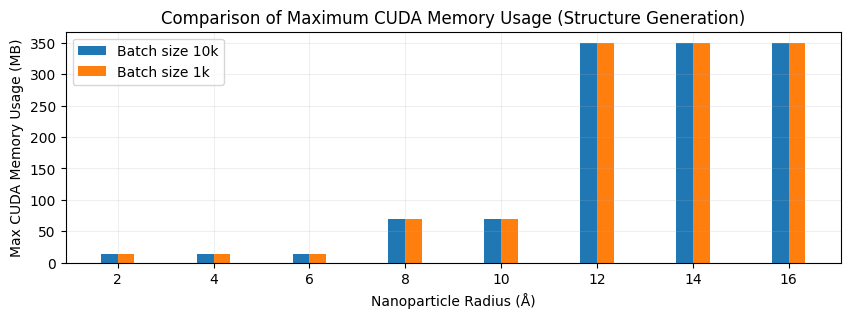

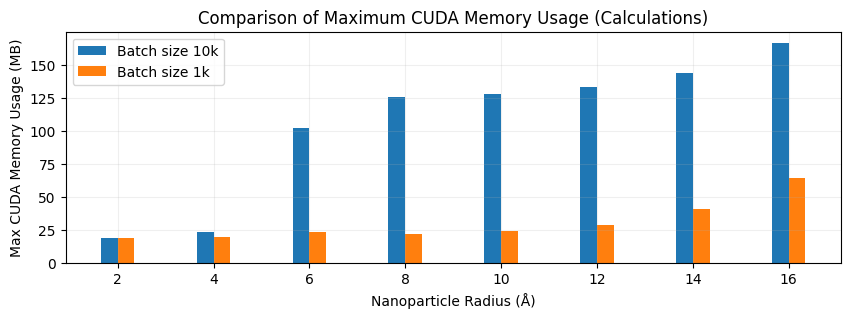

In [5]:
# Plot calculation time trends for CPU and CUDA
plt.figure(figsize=(10, 3))
plt.xlabel('Nanoparticle Radius (Å)')
plt.ylabel('Mean Calculation Time (s)')

# Extract data for plotting
means_cpu = np.array(loaded_stats_cpu.means)
stds_cpu = np.array(loaded_stats_cpu.stds)
means_cuda_10k = np.array(loaded_stats_cuda_10k.means)
stds_cuda_10k = np.array(loaded_stats_cuda_10k.stds)
means_cuda_1k = np.array(loaded_stats_cuda_1k.means)
stds_cuda_1k = np.array(loaded_stats_cuda_1k.stds)

# Plotting trends
p = plt.plot(loaded_stats_cpu.radii, means_cpu, label='CPU', marker='o')
plt.fill_between(loaded_stats_cpu.radii, means_cpu - stds_cpu, means_cpu + stds_cpu, 
                 color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.radii, means_cuda_10k, label='CUDA, batch size 10k', marker='o')
plt.fill_between(loaded_stats_cuda_10k.radii, means_cuda_10k - stds_cuda_10k, means_cuda_10k + stds_cuda_10k,
                 color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_1k.radii, means_cuda_1k, label='CUDA, batch size 1k', marker='o')
plt.fill_between(loaded_stats_cuda_1k.radii, means_cuda_1k - stds_cuda_1k, means_cuda_1k + stds_cuda_1k, 
                 color=p[0].get_color(), alpha=0.2)

plt.legend()
plt.grid(alpha=0.2)
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 3))
plt.xlabel('Number of atoms')
plt.ylabel('Mean Calculation Time (s)')

# Plotting trends
p = plt.plot(loaded_stats_cpu.num_atoms, means_cpu, label='CPU', marker='o')
plt.fill_between(loaded_stats_cpu.num_atoms, means_cpu - stds_cpu, means_cpu + stds_cpu,
                 color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_10k.num_atoms, means_cuda_10k, label='CUDA, batch size 10k', marker='o')
plt.fill_between(loaded_stats_cuda_10k.num_atoms, means_cuda_10k - stds_cuda_10k, means_cuda_10k + stds_cuda_10k,
                 color=p[0].get_color(), alpha=0.2)

p = plt.plot(loaded_stats_cuda_1k.num_atoms, means_cuda_1k, label='CUDA, batch size 1k', marker='o')
plt.fill_between(loaded_stats_cuda_1k.num_atoms, means_cuda_1k - stds_cuda_1k, means_cuda_1k + stds_cuda_1k,
                 color=p[0].get_color(), alpha=0.2)

plt.legend()
plt.grid(alpha=0.2)
plt.yscale('log')
plt.show()

# Bar plot comparing maximum CUDA memory usage (structure)
plt.figure(figsize=(10, 3))
plt.title('Comparison of Maximum CUDA Memory Usage (Structure Generation)')
plt.xlabel('Nanoparticle Radius (Å)')
plt.ylabel('Max CUDA Memory Usage (MB)')

# Extract data for plotting
cuda_mem_max_10k = loaded_stats_cuda_10k.cuda_mem_structure
cuda_mem_max_1k = loaded_stats_cuda_1k.cuda_mem_structure
radii = np.array(loaded_stats_cuda_10k.radii)

# Plotting comparison with adjusted x-axis positions
bar_width = 0.35  # You can adjust this value based on your preference

plt.bar(radii - bar_width/2, cuda_mem_max_10k, width=bar_width, label='Batch size 10k')
plt.bar(radii + bar_width/2, cuda_mem_max_1k, width=bar_width, label='Batch size 1k')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Bar plot comparing maximum CUDA memory usage (calculations)
plt.figure(figsize=(10, 3))
plt.title('Comparison of Maximum CUDA Memory Usage (Calculations)')
plt.xlabel('Nanoparticle Radius (Å)')
plt.ylabel('Max CUDA Memory Usage (MB)')

# Extract data for plotting
cuda_mem_max_10k = loaded_stats_cuda_10k.cuda_mem_calculations
cuda_mem_max_1k = loaded_stats_cuda_1k.cuda_mem_calculations
radii = np.array(loaded_stats_cuda_10k.radii)

# Plotting comparison with adjusted x-axis positions
bar_width = 0.35  # You can adjust this value based on your preference

plt.bar(radii - bar_width/2, cuda_mem_max_10k, width=bar_width, label='Batch size 10k')
plt.bar(radii + bar_width/2, cuda_mem_max_1k, width=bar_width, label='Batch size 1k')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

### 4. Reference 